In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
PATH = os.path.abspath('..')
# you may need to mount the drive if you've changed the runtime
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
bs = 16
sz = 32
PATH = os.path.abspath('/content/drive/My Drive/convnet-demo')

In [5]:
train_label_csv = f'{PATH}/catalogs/train.csv'

df = pd.read_csv(train_label_csv)

In [6]:
df.head()

objID    oh_p50
0  1237648704043942146  8.882136
1  1237667292122513532  8.951163
2  1237665441525596194  8.823326
3  1237674289683300721  9.104471
4  1237663716556341422  9.014245

# Set up DataBunch object

In [8]:
src = (ImageItemList.from_df(df, path=PATH, folder='train', suffix='.jpg', cols='objID')
                .random_split_by_pct(0.2, seed=1234)
                .label_from_df(cols='oh_p50',  label_cls=FloatList)
      )

NameError: ignored

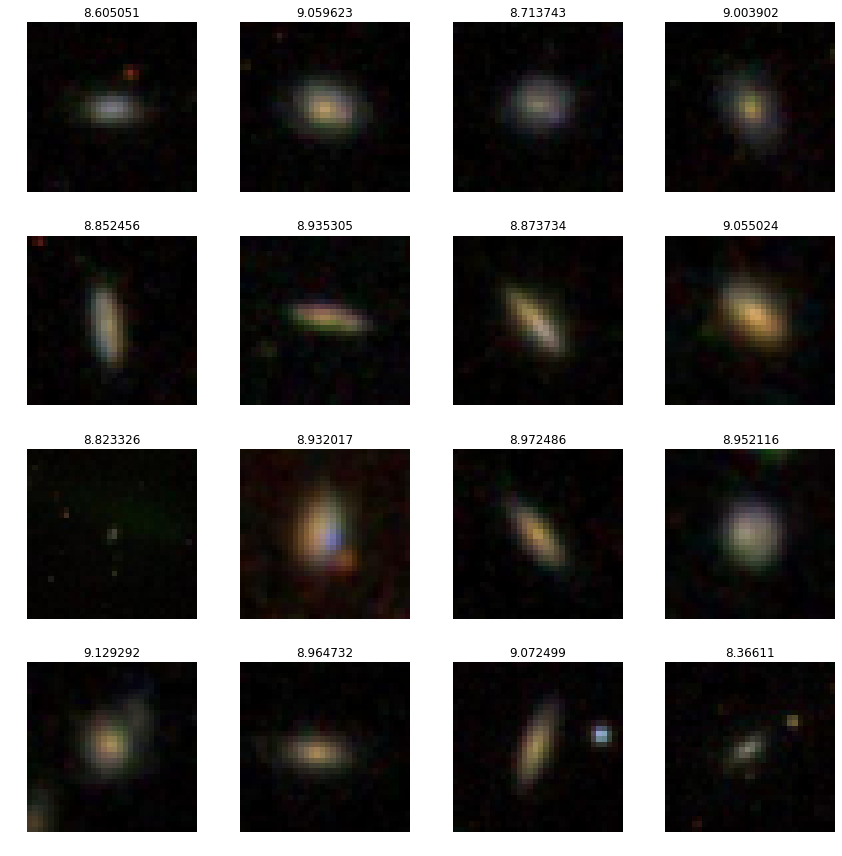

In [ ]:
data.show_batch(4, figsize=(12, 12))

# Set up simple convnet

In [ ]:
defaults.device = torch.device('cpu')

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, pretrained=False):                  # pretrained kw is hardcoded into create_cnn
        super(SimpleCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(32*32*32, 1)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [ ]:
learn = create_cnn(data, arch=SimpleCNN, pretrained=False, loss_func=root_mean_squared_error)
#learn = create_cnn(data, arch=models.resnet18, pretrained=True, loss_func=root_mean_squared_error)

# Find learning rate and train

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


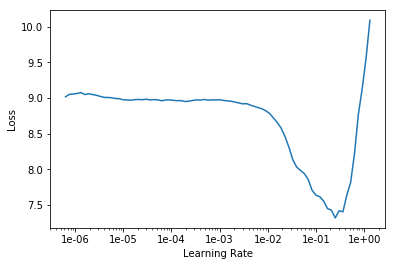

In [ ]:
learn.lr_find(end_lr=10)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8, slice(1e-3, 3e-2))

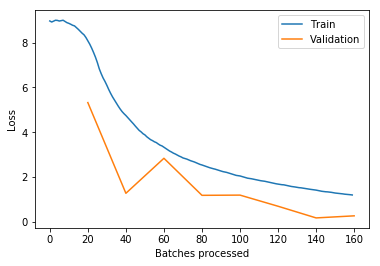

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(10, slice(3e-4, 1e-2))

In [ ]:
learn.fit_one_cycle(20, slice(3e-5, 3e-3), pct_start=0.8)

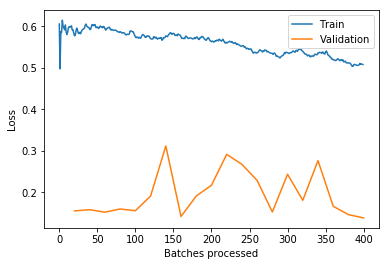

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(10, slice(3e-5, 3e-3), pct_start=0.8)

In [ ]:
learn.fit_one_cycle(10, slice(1e-5, 1e-3), pct_start=0.8)

# Results

In [ ]:
Z_pred, Z_true = learn.TTA()

In [ ]:
root_mean_squared_error(Z_pred, Z_true)

tensor(0.1375)

# Use `resnet18`

In [ ]:
learn = create_cnn(data, arch=models.resnet18, pretrained=True, loss_func=root_mean_squared_error)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


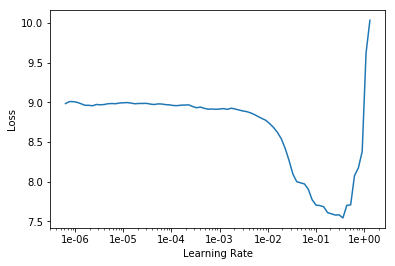

In [ ]:
learn.lr_find(end_lr=10)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(20, slice(3e-4, 3e-2), pct_start=0.7)

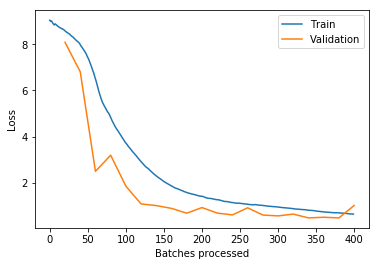

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(20, slice(1e-6, 1e-4))

# Old fitting method

In [ ]:
learn = create_cnn(data, arch=models.resnet18, pretrained=True, loss_func=root_mean_squared_error)

In [ ]:
learn.fit(epochs=2, lr=0.1)

In [ ]:
learn.fit(epochs=4,  lr=1e-2)